In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
login = pd.read_json('logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
login.describe()

,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


# Part one

In [4]:
login.dtypes

login_time    datetime64[ns]
dtype: object

In [5]:
# Aggregate login counts based on 15 minute time intervals

login_counts = login.resample('15min', on='login_time').count()

login_counts.rename({'login_time':'logins'}, axis=1, inplace=True)
login_counts.reset_index(inplace=True)

login_counts.head(10)

,login_time,logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
5,1970-01-01 21:15:00,4
6,1970-01-01 21:30:00,0
7,1970-01-01 21:45:00,4
8,1970-01-01 22:00:00,9
9,1970-01-01 22:15:00,8


In [6]:
# Visualize and describe the resulting time series login counts in ways that best characterize the underlying 
# patterns of demand.
# Report/illustrate important features of the demand, such as daily cycles.

login_counts['hour'] = login_counts['login_time'].dt.hour
login_counts['day'] = login_counts['login_time'].dt.day_name()

In [7]:
# logins per hour
login_hours = login_counts.groupby('hour').sum()[['logins']]

# average hourly logins
login_hours['hourly_avg'] = login_counts.groupby('hour').mean()[['logins']]

display(login_hours)

,logins,hourly_avg
hour,,
0,5993,14.688725
1,6317,15.482843
2,5800,14.215686
3,4831,11.840686
4,5034,12.338235
5,2945,7.218137
6,1138,2.789216
7,815,1.997549
8,818,2.004902


In [8]:
# logins per day
login_days = login_counts.groupby('day').sum()[['logins']]

# average daily logins
login_days['daily_avg'] = login_counts.groupby('day').mean()[['logins']]

display(login_days)

,logins,daily_avg
day,,
Friday,15208,10.561111
Monday,8823,6.213380
Saturday,19377,13.456250
Sunday,18167,12.615972
Thursday,11960,8.794118
Tuesday,9268,6.895833
Wednesday,10339,7.692708


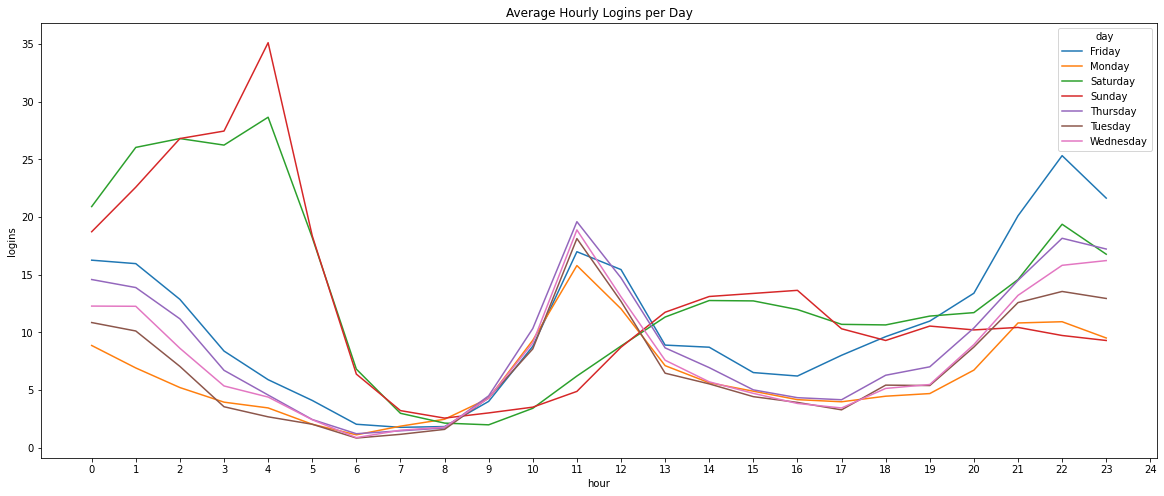

In [9]:
login_total = login_counts.groupby(['hour','day']).mean().reset_index()

# Plotting logins
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.lineplot(data=login_total, x='hour', y='logins', hue='day')
ax.set(title='Average Hourly Logins per Day')
plt.xticks(range(0,25))

plt.show()

Based on this visualization above, we can draw three conclusions:
1. The most logins (Ultimate ride request) occur late night on Friday and Saturday, which includes early mornings on Saturdays and Sundays.
2. Logins are increased during Lunch hours mid-day
3. The least amount of logins occur in the morning hours between 6-8am

# Part two

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Provide:
1. How will you implement the experiment
2. What statistical tests will you conduct to verify the significance of the observation
3. How would you interpret the results and provide recommendations to the city operations team as well as concerns


Part Two response:

If Ultimate wants to conduct an experiment with the goal of improving customer retention, the best way to go about this would be to conduct an A/B Test. By encouraging drivers to drive back and forth between cities by reimbursing toll costs, we can test the effectiveness of this new strategy on customer retention by creating two groups. One group of drivers will be offered the reimbursement for tolls, and the other group of drivers continue to go about their normal routes. As both groups of drivers complete their trips throughout the next few weeks, there are a few factors that we would want to focus on that will best denote a difference in customer retention. These factors include:
1. Compare average total fare, as brought about by increased distance traveled. This could additionally lead to increased tip amount, which could encourage drivers to make the tolled trip between the two cities more often.
2. Compare average wait times: This includes the customer calling for a ride and the driver being too far away, presumably in the opposite city, leading to it being more likely that either the driver or the customer will cancel the ride due to the wait time and/or distance being too long. 
3. Compare average rush hour/surge prices: The costs of surging fares during times of increased demand and traffic and the effects of using these rides to cross the toll bridge during peak hours
4. Compare overall average daily rides (a.k.a. logins) between both groups.

These metrics can be observed and interpreted at the end of the trial period, which can be denoted as 30 days, with each day serving as a trial. Therefore, we will be comparing the 30 days of the drivers participating in the reimbursement program (lets call them Group A) against 30 days of the drivers that are not using the reimbursement program (Group B). This will be measured by pulling and sorting the data from each daily trial measured during the 30 day period, comparing the three components listed. 


Null Hypothesis: There will be no change in customer retention based on the means being compared between the group that receives toll reimbursements and the group that does not.

Alternative Hypothesis: The group that receives toll reimbursements will attract more customers for retention than the group that does not receive toll reimbursements based on the means being compared between the groups.

We can simulate our experiment by randomly assigning the reimbursements to 50% of the sample of drivers, while the other 50% continue driving as usual with no reimbursements. After 30 days at the end of the trial period, assuming the null hypothesis is true, we can test for the p-value to determine how probable the data is to fall under the null hypothesis. The more unlikely our null hypothesis is (P < 0.05), the more we will be able to determine the likelihood of the reimbursement program increasing customer retention.

# Part three

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.


1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [11]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [12]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [14]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [15]:
df['signup_date'].describe()

count          50000
unique            31
top       2014-01-18
freq            2948
Name: signup_date, dtype: object

In [16]:
df['ultimate_black_user'].value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

In [17]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [18]:
# Parse dates into datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [19]:
df['signup_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: signup_date
Non-Null Count  Dtype         
--------------  -----         
50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 390.8 KB


In [20]:
df['signup_date'].describe()

count                   50000
unique                     31
top       2014-01-18 00:00:00
freq                     2948
first     2014-01-01 00:00:00
last      2014-01-31 00:00:00
Name: signup_date, dtype: object

In [21]:
df['last_trip_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: last_trip_date
Non-Null Count  Dtype         
--------------  -----         
50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 390.8 KB


In [22]:
df['last_trip_date'].describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [23]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [24]:
df = df.drop(df[df.avg_rating_of_driver.isna()==True].index,axis=0)
df = df.drop(df[df.phone.isna()==True].index,axis=0)
df = df.drop(df[df.avg_rating_by_driver.isna()==True].index,axis=0)

In [25]:
df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [26]:
latest_date = df['last_trip_date'].max()

df['active'] = df['last_trip_date'].apply(lambda date: 0 if (latest_date - date).days > 30 else 1)
df.head(15)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,1
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,0
10,Winterfell,1,2014-01-13,5.0,1.00,2014-05-30,iPhone,0.0,True,100.0,4.28,4.9,0
11,Winterfell,3,2014-01-06,4.0,1.00,2014-01-10,iPhone,0.0,False,100.0,3.81,5.0,0


In [27]:
df['active'].value_counts()

0    24410
1    17035
Name: active, dtype: int64

In [28]:
# Calculate the approximate percentage of active users
percent = 17035/(24410 + 17035)*100
print(round(percent,3), "% of users have taken a trip in the last 30 days")

41.103 % of users have taken a trip in the last 30 days


In [29]:
for row in df.itertuples():
    signup_6 = pd.Timestamp(row.signup_date)
    date_6 = signup_6 + pd.Timedelta('182D')
    total_6 = date_6 - pd.Timedelta('30D')
    if total_6 <= pd.Timestamp(row.last_trip_date) <= date_6:
        df.at[row.Index, 'active_user_6_months'] = 1
    else:
        df.at[row.Index, 'active_user_6_months'] = 0

df['active_user_6_months'].value_counts()

0.0    30657
1.0    10788
Name: active_user_6_months, dtype: int64

In [30]:
print("The percentage of active users after 6 months is: {}".format(10788/(10788+30657)*100))

The percentage of active users after 6 months is: 26.02967788635541


In [31]:
# Assign X and y for train test split

X = df.drop(['active','signup_date','last_trip_date'],axis=1)
y = df['active']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [32]:
# Import preprocessing packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer

# Pipeline bulding
cat_features = ['city','ultimate_black_user','phone']
cat_trans = [('encoder', OneHotEncoder())]
cat_trans = Pipeline(cat_trans)

num_features = ['trips_in_first_30_days','avg_rating_of_driver','avg_surge','surge_pct','weekday_pct','avg_rating_by_driver','avg_dist']
num_trans = [('scaler', StandardScaler())]
num_trans = Pipeline(num_trans)



In [33]:
pps = ColumnTransformer(transformers=[('num', num_trans, num_features),('cat', cat_trans, cat_features)])

pipeline = Pipeline(steps = [('pre', pps), ('rf', RandomForestClassifier(random_state=42))])
params = {"rf__n_estimators": [100,200,300],
          "rf__max_depth": [4,5,10]
}

cv = GridSearchCV(pipeline, param_grid=params, cv=3)
cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['trips_in_first_30_days',
                                                                          'avg_rating_of_driver',
                                                                          'avg_surge',
                                                                          'surge_pct',
                                                                          'weekday_pct',
                                                                          'avg_rating_by_driver',
                                                                          'avg_dist'

In [34]:
print("Best Parameters: {}".format(cv.best_params_))
print("Training accuracy using best model: {}%".format(cv.best_score_*100))

Best Parameters: {'rf__max_depth': 10, 'rf__n_estimators': 300}
Training accuracy using best model: 77.63606807361005%


Based on these results, the best model and parameters produce a score of 77.6% accuracy on the training set.

In [35]:
from sklearn import metrics

y_pred = cv.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, y_pred)
test_f1 = metrics.f1_score(y_test, y_pred)

print("The accuracy of the test data on the model is {}%".format(test_accuracy*100))
print("The F1 score of the test data on the model is {}".format(test_f1))

The accuracy of the test data on the model is 77.28003860382822%
The F1 score of the test data on the model is 0.7118229113536673


In [36]:
pipeline.fit(X_train, y_train)
weights = pipeline.named_steps['rf'].feature_importances_

# Get dummy variables
num_cols = df[num_features].columns.values
cat_cols = pd.get_dummies(df[cat_features]).columns.values
total_cols = list(num_cols) + list(cat_cols)

In [37]:
weight_dict = dict(zip(total_cols, weights))
sorted_dict = sorted(weight_dict.items(), key= lambda x: x[1], reverse=True)

sorted_dict

[('avg_dist', 0.2692878359781458),
 ('weekday_pct', 0.14461136874826813),
 ('avg_rating_by_driver', 0.12264060313432043),
 ('trips_in_first_30_days', 0.08321684468324335),
 ('avg_rating_of_driver', 0.0819416905484081),
 ('surge_pct', 0.07940597882581978),
 ('avg_surge', 0.06858278485006063),
 ('city_Astapor', 0.04780261521027316),
 ('phone_iPhone', 0.02152400847873225),
 ('city_Winterfell', 0.017699081429600142),
 ('phone_Android', 0.01762586366793942),
 ('ultimate_black_user', 0.016644436409632396),
 ("city_King's Landing", 0.011847189670672992)]

Based on these weighted results, we can see that avg_dist (average distance traveled) is the most influential feature among all of the columns, with weekday_pct being close behind in importance. Another key takeaway is that more people are traveling to or from the city of Astapor than other cities and using iPhones rather than Androids.